In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
from reedsolo import ReedSolomonError

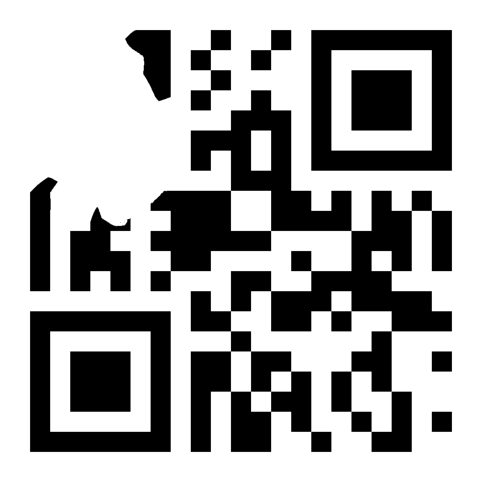

In [2]:
image_path = "07-THE-MIGHTY-FINGER.png"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert to grayscale to focus on intensity rather than color for mask creation
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a mask where the grayscale value is close to the color of the thumb
_, mask = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)  # Dilate to cover all the obscured parts
mask = cv2.erode(mask, kernel, iterations=2)   # Erode to refine the edges of the mask

# Perform inpainting
inpainted_image = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# Convert to binary for QR readability
gray_inpainted = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2GRAY)
_, final_scan_ready = cv2.threshold(gray_inpainted, 127, 255, cv2.THRESH_BINARY)

# Display the inpainted and ready-to-scan image
plt.figure(figsize=(6, 6))
plt.imshow(final_scan_ready, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(final_scan_ready):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(final_scan_ready[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = final_scan_ready.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(final_scan_ready)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(final_scan_ready)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = final_scan_ready.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

44 968 44 968


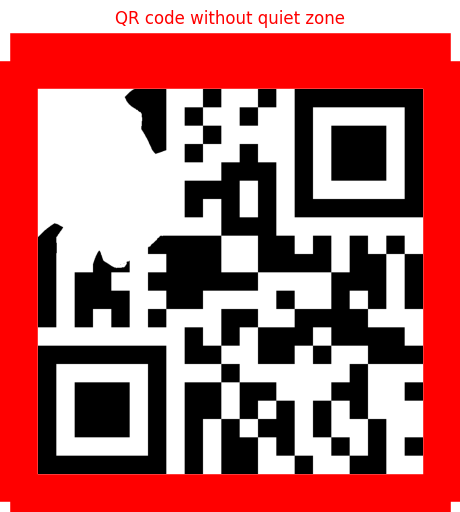

In [4]:
qr_no_quiet_zone = final_scan_ready[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

In [5]:
size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1

print(f'size: {size}')

grid_cell_size = round(size/7)
print(f'grid cell size: {grid_cell_size}')

grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
print(f'grid cell num: {grid_cells_num}')

print(f'shape: {qr_no_quiet_zone.shape}')

qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(f'qr cells: {qr_cells.shape}')

qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(f'qr cells numeric:\n {qr_cells_numeric}')


size: 0
grid cell size: 0


ZeroDivisionError: division by zero